In [23]:
%matplotlib inline

import nltk.data

from gensim.models import word2vec
from sklearn.cluster import KMeans
from sklearn.neighbors import KDTree

import pandas as pd
import numpy as np

import os
import re
import logging;
import time
import sys
import multiprocessing
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from itertools import cycle

In [24]:
import codecs

In [25]:
corpus = u""
book1 = codecs.open('got1.txt', 'r', "utf-8")
book2 = codecs.open('got2.txt', 'r', "utf-8")
book3 = codecs.open('got3.txt', 'r', "utf-8")
book4 = codecs.open('got4.txt', 'r', "utf-8")
book5 = codecs.open('got5.txt', 'r', "utf-8")

In [26]:
corpus += book1.read()
corpus += book2.read()
corpus += book3.read()
corpus += book4.read()
corpus += book5.read()

In [27]:
len(corpus)

7173840

In [28]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle');

In [29]:
raw_sentences = tokenizer.tokenize(corpus)

In [94]:
#cleaning the corpus a bit
def sentence_to_wordlist(sentence):
    no_tabs = str(sentence).replace('\t', ' ').replace('\n', ' ');
    
        #Remove all characters except A-Z and a dot.
    alphas_only = re.sub("[^a-zA-Z\.]", " ", no_tabs);
        
        #Normalize spaces to 1
    multi_spaces = re.sub(" +", " ", alphas_only);
        
        #Strip trailing and leading spaces
    no_spaces = multi_spaces.strip();
        
        #Normalize all charachters to lowercase
    clean_text = no_spaces.lower();
    words = clean_text.split()
    return words

In [95]:
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [98]:
print(sentences[3])
print(raw_sentences[3])

['copyright', 'by', 'george', 'r.', 'r.', 'martin.']
Copyright © 1999 by George R. R. Martin.


In [99]:
start = time.time();

#Set the logging format to get some basic updates.
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 100;    # Dimensionality of the hidden layer representation
min_word_count = 40;   # Minimum word count to keep a word in the vocabulary
num_workers = multiprocessing.cpu_count();       # Number of threads to run in parallel set to total number of cpus.
context = 5          # Context window size (on each side)                                                       
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model. 
#The LineSentence object allows us to pass in a file name directly as input to Word2Vec,
#instead of having to read it into memory first.

print("Training model...");
model = word2vec.Word2Vec(sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling);

# We don't plan on training the model any further, so calling 
# init_sims will make the model more memory efficient by normalizing the vectors in-place.
model.init_sims(replace=True);

# Save the model
model_name = "model_full_reddit";
model.save(model_name);

print('Total time: ' + str((time.time() - start)) + ' secs')

2018-06-24 12:21:28,568 : INFO : collecting all words and their counts
2018-06-24 12:21:28,569 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-06-24 12:21:28,597 : INFO : PROGRESS: at sentence #10000, processed 142262 words, keeping 11815 word types
2018-06-24 12:21:28,628 : INFO : PROGRESS: at sentence #20000, processed 282233 words, keeping 15975 word types
2018-06-24 12:21:28,662 : INFO : PROGRESS: at sentence #30000, processed 428399 words, keeping 19464 word types
2018-06-24 12:21:28,693 : INFO : PROGRESS: at sentence #40000, processed 572939 words, keeping 22085 word types
2018-06-24 12:21:28,732 : INFO : PROGRESS: at sentence #50000, processed 715371 words, keeping 24020 word types
2018-06-24 12:21:28,767 : INFO : PROGRESS: at sentence #60000, processed 847357 words, keeping 25724 word types


Training model...


2018-06-24 12:21:28,809 : INFO : PROGRESS: at sentence #70000, processed 981643 words, keeping 27147 word types
2018-06-24 12:21:28,850 : INFO : PROGRESS: at sentence #80000, processed 1126788 words, keeping 28470 word types
2018-06-24 12:21:28,889 : INFO : PROGRESS: at sentence #90000, processed 1281637 words, keeping 29544 word types
2018-06-24 12:21:28,904 : INFO : collected 29978 word types from a corpus of 1348708 raw words and 94294 sentences
2018-06-24 12:21:28,905 : INFO : Loading a fresh vocabulary
2018-06-24 12:21:28,920 : INFO : min_count=40 retains 2988 unique words (9% of original 29978, drops 26990)
2018-06-24 12:21:28,921 : INFO : min_count=40 leaves 1186135 word corpus (87% of original 1348708, drops 162573)
2018-06-24 12:21:28,931 : INFO : deleting the raw counts dictionary of 29978 items
2018-06-24 12:21:28,933 : INFO : sample=0.001 downsamples 55 most-common words
2018-06-24 12:21:28,933 : INFO : downsampling leaves estimated 842329 word corpus (71.0% of prior 118613

Total time: 2.8850979804992676 secs


In [100]:
Z = model.wv.syn0;

print(Z[0].shape)
Z[0]

(100,)


/home/therochvoices/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


array([ 0.04917054, -0.05048471,  0.06292479, -0.05428317, -0.00311557,
        0.01370272, -0.15277663, -0.06804673,  0.06142257,  0.15081778,
        0.17524628, -0.07025087, -0.06792534, -0.00923483,  0.1412522 ,
       -0.07511839,  0.11816825, -0.03708433, -0.05193344, -0.05455773,
        0.0112755 , -0.11733751,  0.13758023, -0.0191504 , -0.05128028,
        0.06645479, -0.10306124,  0.1413354 ,  0.09387906, -0.12837325,
        0.0894337 ,  0.00385344,  0.14094281,  0.01064624, -0.2046606 ,
        0.10617352, -0.1031416 , -0.05451788,  0.15164785, -0.08155971,
        0.02658188, -0.06194078, -0.14190826,  0.01226823,  0.07333271,
       -0.02148726, -0.01249938,  0.0246108 ,  0.01388751, -0.01129342,
        0.05825   ,  0.14429316,  0.06563914, -0.1865242 ,  0.07074893,
       -0.03166453, -0.06125454,  0.17775598,  0.16565175, -0.02351902,
        0.00883297,  0.09091604, -0.20682608,  0.08119093,  0.02524574,
       -0.09114547, -0.06399494, -0.03356898, -0.10835277, -0.11

In [102]:
def clustering_on_wordvecs(word_vectors, num_clusters):
    # Initalize a k-means object and use it to extract centroids
    kmeans_clustering = KMeans(n_clusters = num_clusters, init='k-means++')
    idx = kmeans_clustering.fit_predict(word_vectors)
    
    return kmeans_clustering.cluster_centers_, idx

In [103]:
centers, clusters = clustering_on_wordvecs(Z, 50);
centroid_map = dict(zip(model.wv.index2word, clusters));

In [107]:
type(centroid_map)

dict

In [109]:
def get_top_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs);

#Closest points for each Cluster center is used to query the closest 20 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers];
    closest_words_idxs = [x[1] for x in closest_points];

#Word Index is queried for each position in the above array, and added to a Dictionary.
    closest_words = {};
    for i in range(0, len(closest_words_idxs)):
        closest_words['Cluster #' + str(i)] = [index2word[j] for j in closest_words_idxs[i][0]]

#A DataFrame is generated from the dictionary.
    df = pd.DataFrame(closest_words);
    df.index = df.index+1

    return df;

In [111]:
top_words = get_top_words(model.wv.index2word, 2000, centers, Z);

In [178]:
def print_word_table(table, key):
    return pd.DataFrame(table, columns=[key, 'similarity'])

print_word_table(model.wv.most_similar_cosmul(positive=['king', 'woman'], negative=['queen']), 'Analogy')

,Analogy,similarity
0,man,0.951817
1,bear,0.853822
2,crow,0.850769
3,giant,0.849724
4,eye,0.848270
5,year,0.845528
6,boy,0.840857
7,man.,0.834571
8,singer,0.819985
9,priest,0.815728


In [143]:
model.wv.doesnt_match("arya sansa jon rickon bran robb".split())

'jon'

In [159]:
model.most_similar("stark")

/home/therochvoices/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('arryn', 0.8534143567085266),
 ('brandon', 0.852333664894104),
 ('eddard', 0.8336315751075745),
 ('stark.', 0.8271368741989136),
 ('murdered', 0.7937789559364319),
 ('lysa', 0.7864471077919006),
 ('daenerys', 0.7388279438018799),
 ('ward', 0.7352973818778992),
 ('tully', 0.7342249155044556),
 ('greyjoy', 0.7277718186378479)]

In [165]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = model.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [167]:
nearest_similarity_cosmul("stark", "winterfell", "riverrun")
nearest_similarity_cosmul("jaime", "sword", "wine")
nearest_similarity_cosmul("arya", "nymeria", "dragons")

stark is related to winterfell, as tully is related to riverrun
jaime is related to sword, as arya is related to wine
arya is related to nymeria, as words is related to dragons


/home/therochvoices/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  after removing the cwd from sys.path.


'words'

In [168]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[mdel.wv.vocab[word].index])
            for word in model.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

NameError: name 'all_word_vectors_matrix_2d' is not defined

In [169]:
def clustering_on_wordvecs(word_vectors, num_clusters):
    # Initalize a k-means object and use it to extract centroids
    kmeans_clustering = KMeans(n_clusters = num_clusters, init='k-means++');
    idx = kmeans_clustering.fit_predict(word_vectors);
    
    return kmeans_clustering.cluster_centers_, idx;

In [170]:
start = time.time();
centers, clusters = clustering_on_wordvecs(Z, 50);
print('Total time: ' + str((time.time() - start)) + ' secs')

Total time: 1.4029803276062012 secs


In [171]:
start = time.time();
centroid_map = dict(zip(model.wv.index2word, clusters));
print('Total time: ' + str((time.time() - start)) + ' secs')

Total time: 0.0009989738464355469 secs


In [172]:
def get_top_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs);

    #Closest points for each Cluster center is used to query the closest 20 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers];
    closest_words_idxs = [x[1] for x in closest_points];

    #Word Index is queried for each position in the above array, and added to a Dictionary.
    closest_words = {};
    for i in range(0, len(closest_words_idxs)):
        closest_words['Cluster #' + str(i+1).zfill(2)] = [index2word[j] for j in closest_words_idxs[i][0]]

    #A DataFrame is generated from the dictionary.
    df = pd.DataFrame(closest_words);
    df.index = df.index+1

    return df;

In [173]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [174]:
top_words = get_top_words(model.wv.index2word, 20, centers, Z);

In [175]:
top_words

,Cluster #01,Cluster #02,Cluster #03,Cluster #04,Cluster #05,Cluster #06,Cluster #07,Cluster #08,Cluster #09,Cluster #10,Cluster #11,Cluster #12,Cluster #13,Cluster #14,Cluster #15,Cluster #16,Cluster #17,Cluster #18,Cluster #19,Cluster #20,Cluster #21,Cluster #22,Cluster #23,Cluster #24,Cluster #25,Cluster #26,Cluster #27,Cluster #28,Cluster #29,Cluster #30,Cluster #31,Cluster #32,Cluster #33,Cluster #34,Cluster #35,Cluster #36,Cluster #37,Cluster #38,Cluster #39,Cluster #40,Cluster #41,Cluster #42,Cluster #43,Cluster #44,Cluster #45,Cluster #46,Cluster #47,Cluster #48,Cluster #49,Cluster #50
1,child,belly.,euron,nodded.,tents,strike,robb.,nephew,striped,windows,stronger,gives,wrong.,reason,m.,broad,hear.,tossed,her.,wildfire,sellswords,almost,dwarf.,westerosi,down.,baelor,talked,ridden,six,either.,sideways,bank,gaunt,innocent,grenn,feast.,yourself,ought,draw,belt,boros,leapt,baelish,beneath,brazier,trust,lys,peace,heard.,offer
2,boy.,helm.,littlefinger,insisted.,scattered,seek,sharply.,son.,plate,shadows,larger,thinks,glad,doubt,eldest,tiny,suffer,slammed,him.,shadow.,slaves,loud,fool.,number,away.,deepwood,remembered,sailed,five,please.,leathers,river,skinny,stupid,pyp,feast,pardon,should,throw,shoulders,harys,ripped,rickard,above,earth.,wish,cities,faith,known,allow
3,woman.,ear,aeron,sighed.,skulls,fight,arya.,grandfather,linen,earth,bigger,loves,dead.,matter.,castellan,orange,fail,jerked,it.,lordling,smallfolk,angry,jape,goats,in.,fleet,noticed,joined,thirty,sam.,backward,west,plump,clever,ygritte,eastwatch,us.,may,break,furs,arys,swung,nestor,atop,stream,pray,holy,duty,forgotten,prove
4,man.,dirk,benjen,grinned.,blades,return,brienne.,wife.,doublet,clouds,worse,says.,afraid,doubt.,harlaw,roots,imagine,kicked,herself.,ship.,soldiers,suddenly,lie.,heroes,on.,motte,realized,fled,ten,tonight,biter,walls.,slender,dangerous,gendry,end.,myself,must,wash,waist,kevan,swept,randyll,below,pool,forget,realm.,marriage,agreed,show
5,whore,mouth.,viserys,demanded.,miles,steal,sansa.,daughter.,gilded,battlements,taller,wrote,truly,notion,redwyne,stained,remember.,wrenched,me.,animal,birds,feeling,thing.,women.,out.,oldtown,saw.,visited,forty,quickly.,kicking,east,silvery,stubborn,meera,voyage,vows,cannot,pull,skin.,cleos,settled,hoster,under,cage,know.,ghis,guest,decided,deliver
6,wench,chest.,quentyn,hesitated.,shields,escape,obara,mother.,velvet,trees.,harder,demanded.,wrong,mind.,darry,ash,admit,lifted,hoping,boar,ravens,strange,smuggler,prayers,forward.,ralf,found,lost,twenty,of.,crawling,bay,mask,foolish,pate,castle.,whatever,might,steal,sweat,gregor,trotted,wyman,behind,chill,promise,westeros,treason,learned,teach
7,fool,sleeve,qyburn,laughed.,tables,learn,smiling.,uncle,scarlet,pines,rather,knows,because,sense,royce,leaves,weep,grabbed,that.,eye.,wolves,badly,bastard.,monsters,back.,trident.,laughed,gotten,four,harm.,laughter.,sea.,white.,strong.,dareon,court,plans,would,wake,swollen,osmund,crept,karstark,outside,sun.,believe,laws,death.,believed,spare
8,girl.,brow,robert,repeated,sailors,wait,however.,sister.,steel.,rising,fewer,tells,true.,part,frey,crooked,expect,yanked,him,axe.,longships,breathing,stubborn,knights.,up.,banner,spoke,changed,fifty,understand.,goose,main,haired,wicked,brienne,war.,mercy,will,turn,boots,ryman,drove,tarly,inside,shaft,ask,houses,message,married,give
9,creature,arm.,val,shrugged.,arrows,remain,reek.,sister,ornate,lake,less,had.,done.,jape,tully,moss,miss,slapped,himself.,bull,boys,pain,folly,seven.,forward,riverlands,listened,taken,sixty,can.,qarl,city.,bearded,bad,hotah,inn,hizdahr,ll,drive,beard.,desmond,peered,janos,across,floor,suppose,kingdoms,honor,insisted,save
10,woman,cheek.,tormund,frowned.,drinking,stay,ned.,brother.,crystal,stones,faster,lied,now.,lack,mace,smooth,write,dropped,them.,tyroshi,dornishmen,queer,ah,outlaws,aside.,stag,hated,eaten,eight,indeed,swinging,mountains,shaped,drunk,gilly,night.,lannisters,meant,beat,heel,hyle,struck,bolton,between,bottom,thank,seven,nephew,proved,

In [176]:
def display_cloud(cluster_num, cmap):
    wc = WordCloud(background_color="black", max_words=2000, max_font_size=80, colormap=cmap);
    wordcloud = wc.generate(' '.join([word for word in top_words['Cluster #' + str(cluster_num).zfill(2)]]))

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('cluster_' + str(cluster_num), bbox_inches='tight')

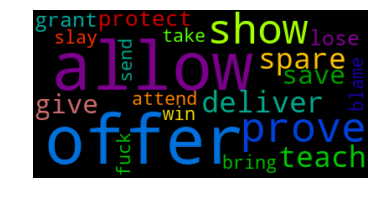

In [177]:
cmaps = cycle([
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])

for i in range(50):
    col = next(cmaps);
    display_cloud(i+1, col)